# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [30]:
df = pd.read_csv('demo_dummy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   sexo                                    6770 non-null   int64
 1   posse_de_veiculo                        6770 non-null   int64
 2   posse_de_imovel                         6770 non-null   int64
 3   qtd_filhos                              6770 non-null   int64
 4   idade                                   6770 non-null   int64
 5   tempo_emprego                           6770 non-null   int64
 6   possui_celular                          6770 non-null   int64
 7   possui_fone_comercial                   6770 non-null   int64
 8   possui_fone                             6770 non-null   int64
 9   possui_email                            6770 non-null   int64
 10  qt_pessoas_residencia                   6770 non-null   int64
 11  mau              

In [31]:
y = df.mau
X = df.drop('mau', axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [33]:
# Definindo o Objeto da Árvore de Decisão:
clf = DecisionTreeClassifier(random_state=100)

In [34]:
# Treinando o Modelo com os Dados de Treinamento:
clf = clf.fit(X_train,y_train)

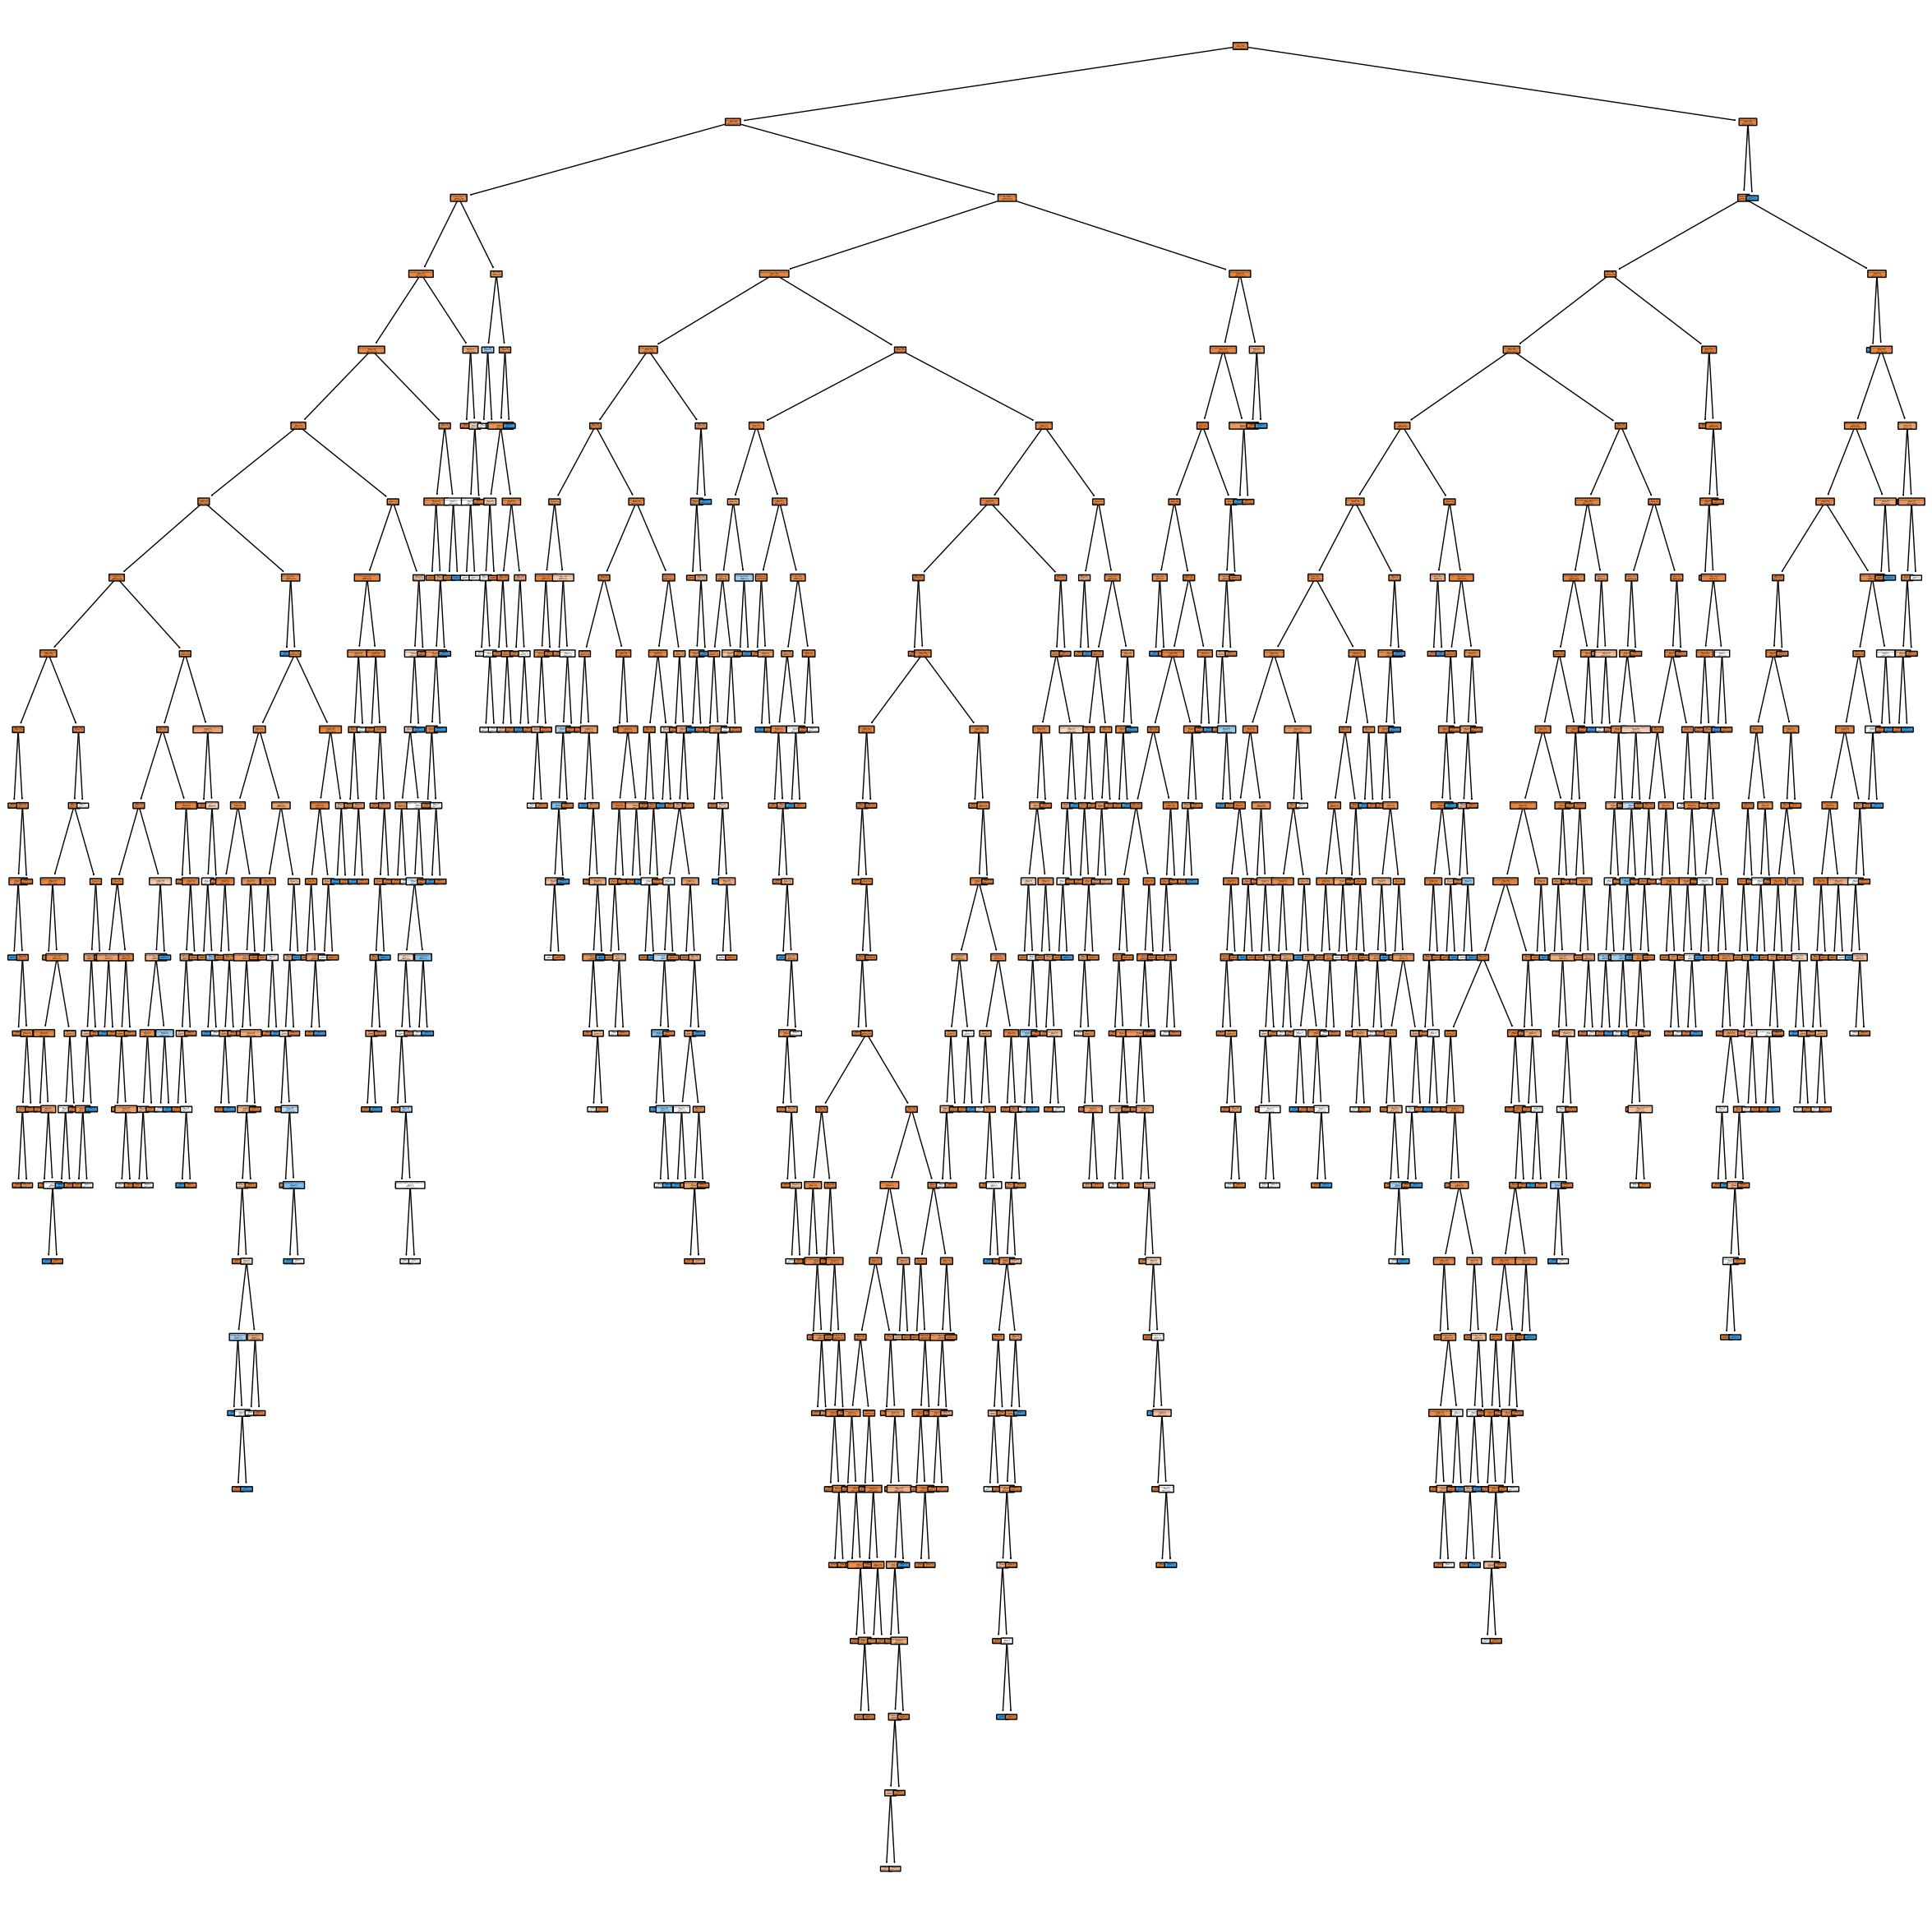

In [35]:
# Visualizando a Árvore:
plt.figure(figsize=[30,30])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names=X_train.columns);

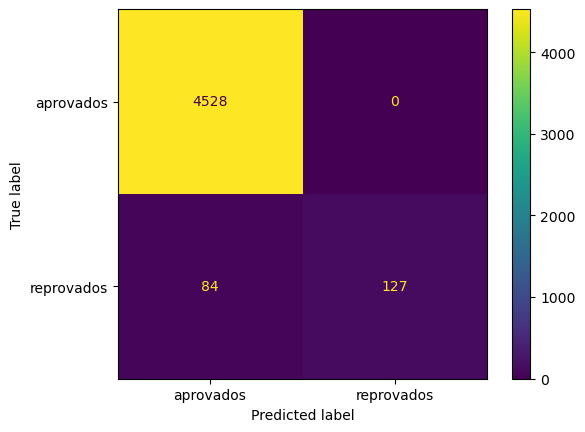

In [36]:
# Produzindo a Matriz de Confusão:

y_chapeu_train = clf.predict(X_train)

cm = confusion_matrix(y_train, y_chapeu_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()


In [37]:
# Calculando a Acurácia na Base de Treinamento:
accuracy_score(y_train, y_chapeu_train)

0.982274741506647

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

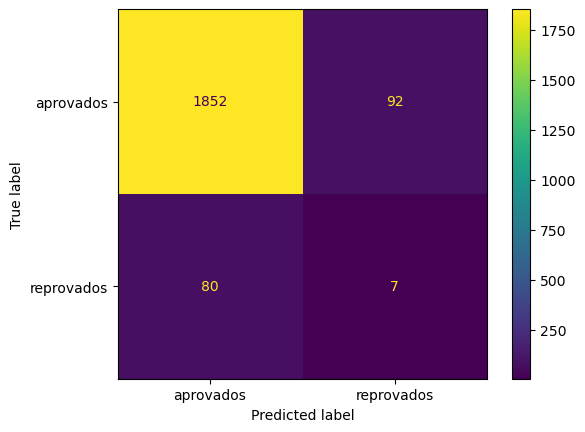

In [38]:
# Classificar a base de teste com a árvore treinada, Produzir a visualização da matriz de confusão para a base de teste:
y_chapeu_test = clf.predict(X_test)

cm = confusion_matrix(y_test, y_chapeu_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()

In [39]:
# Calcular a acurácia na base de teste e comparar com a acurácia na base de treinamento(Treino = 0.98) (Teste = 0.91):
accuracy_score(y_test, y_chapeu_test)

# Valores muito altos para acurácia tanto de treino como de teste, 
# estando pouco flexivel caso seja feita qualquer nova entrada de dados.

0.9153126538650911

In [42]:
# Treinar uma nova árvore com parâmetros específicos e avaliar a matriz de confusão:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)


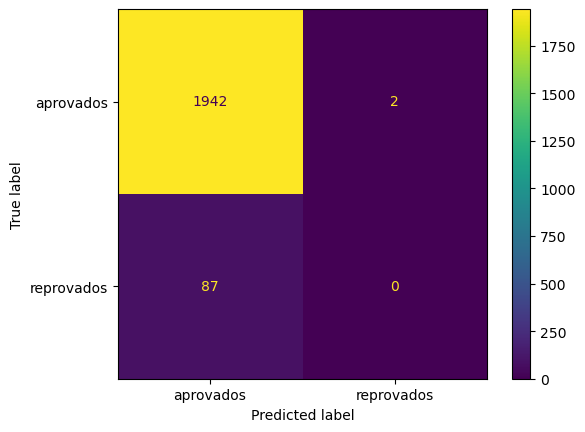

In [43]:
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()

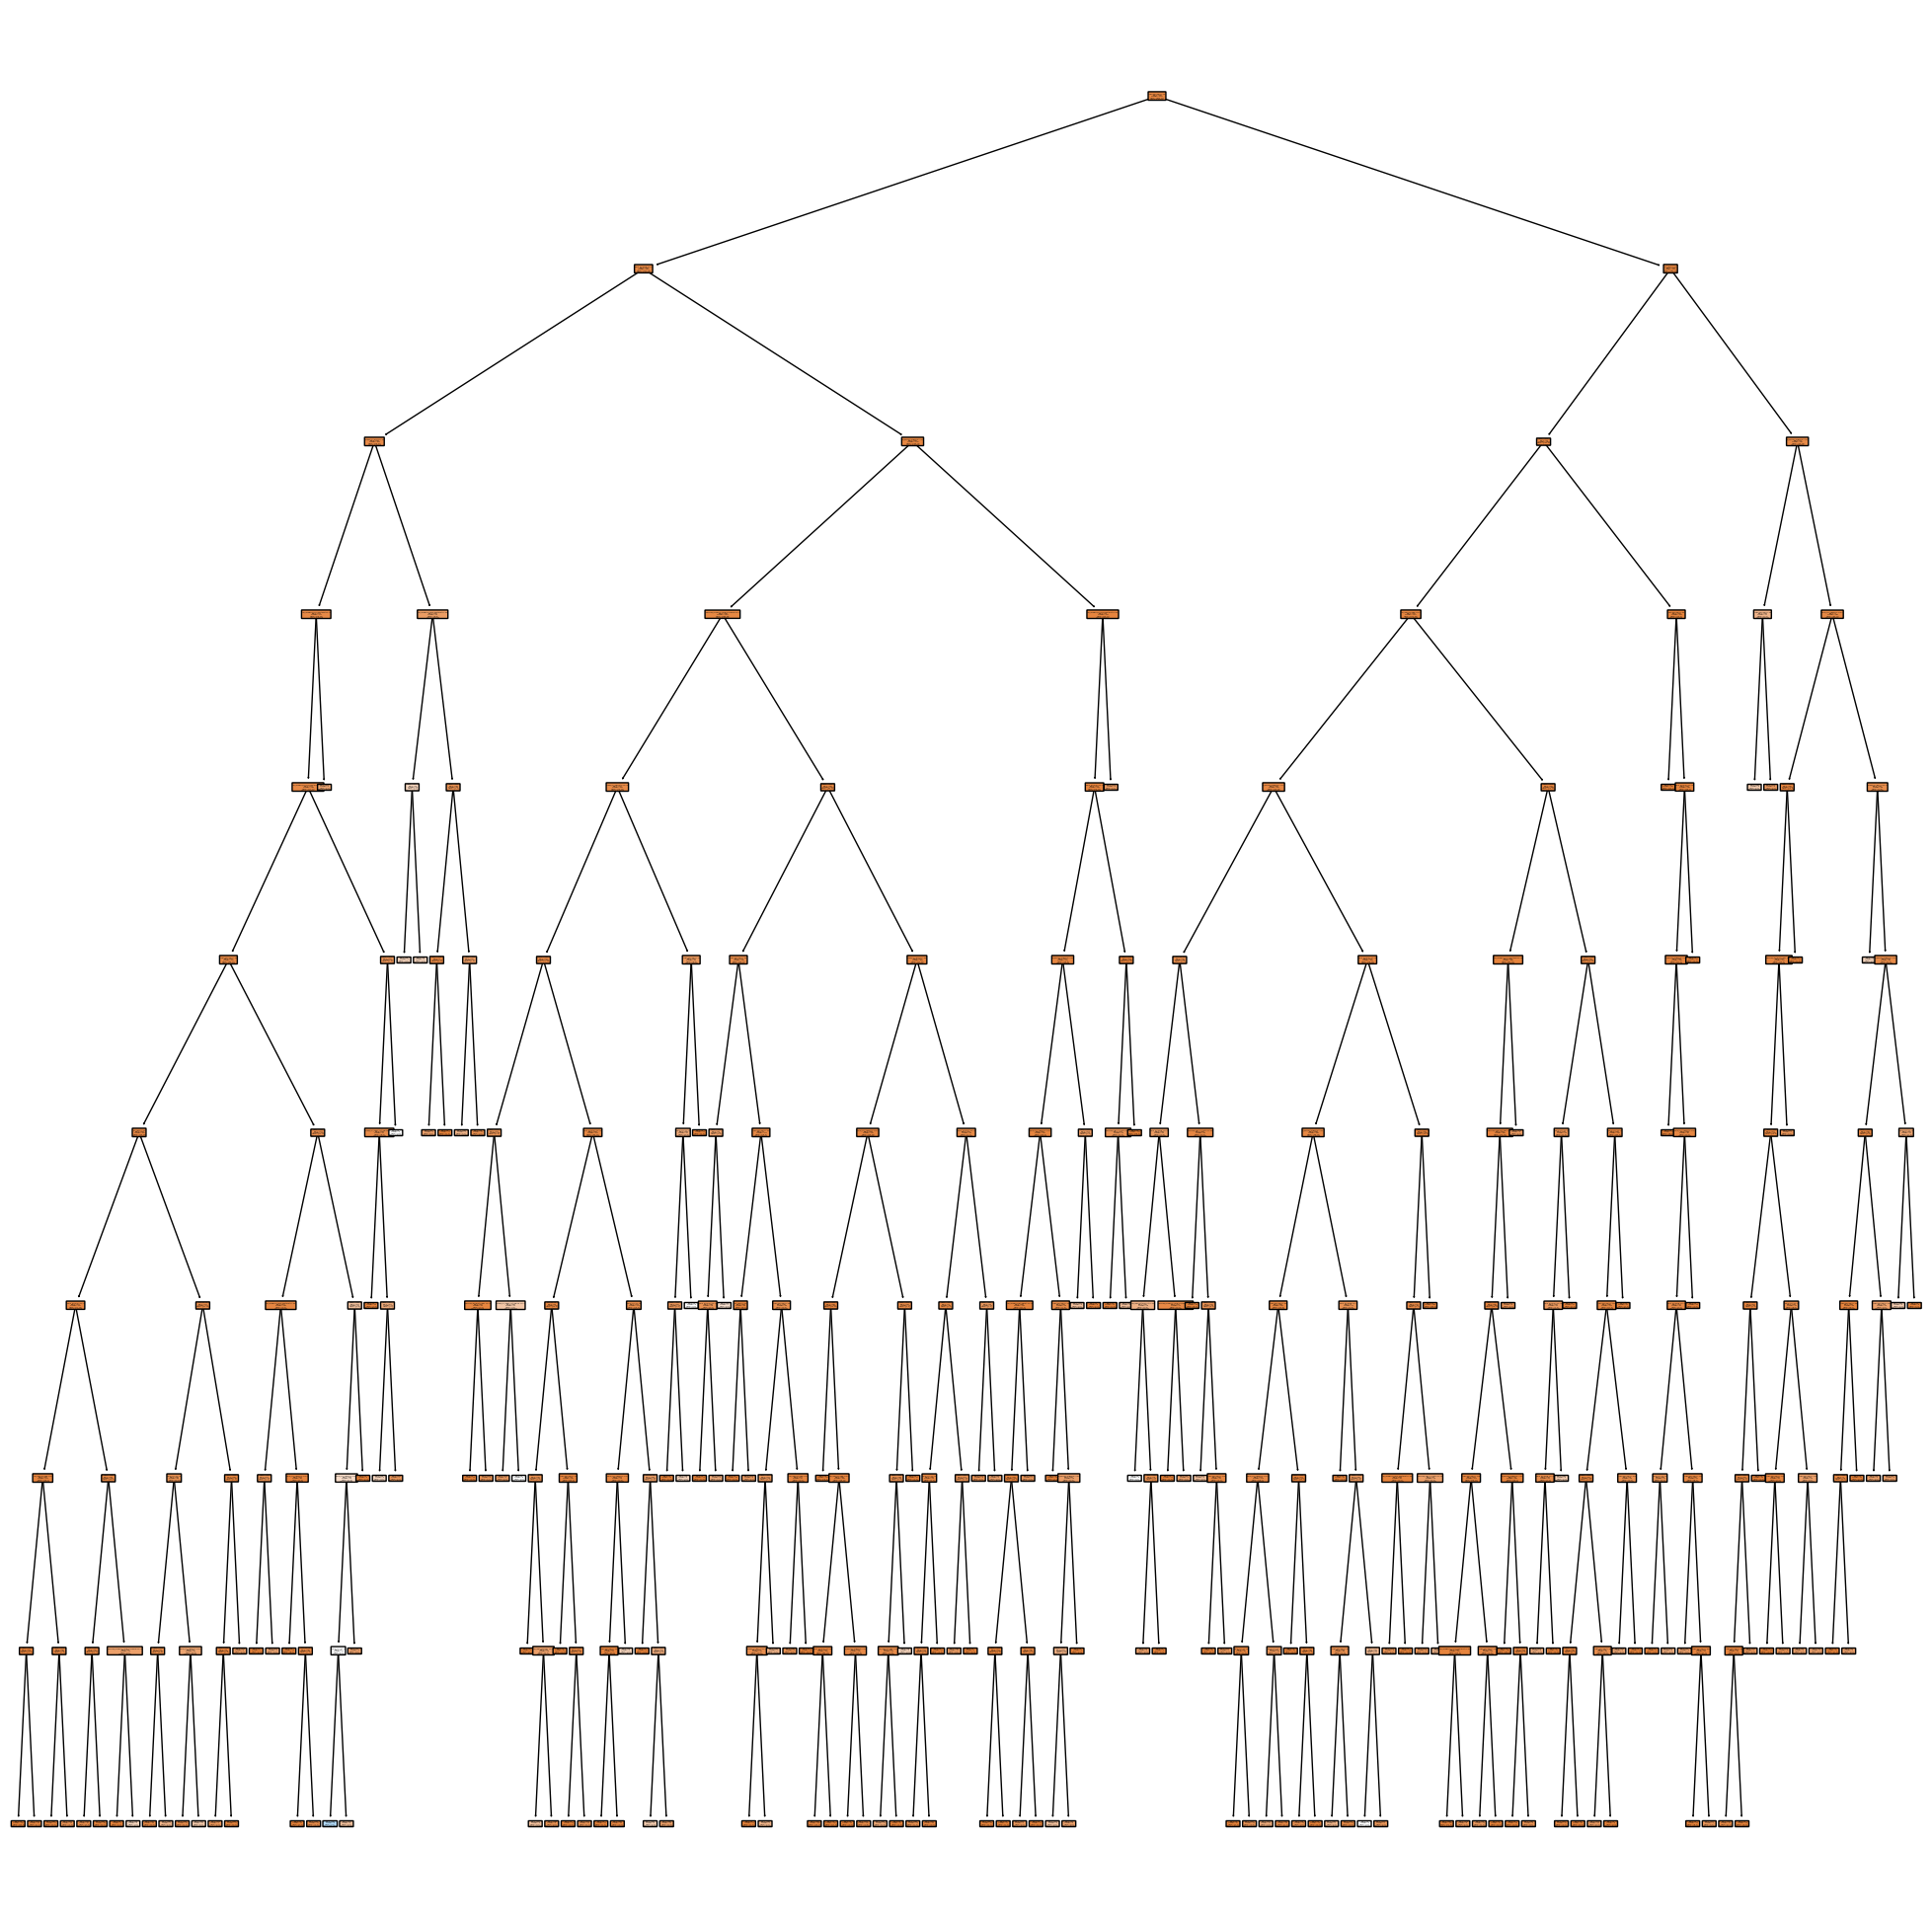

In [47]:
plt.figure(figsize=[25,25])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names=X_test.columns);

In [46]:
accuracy_score(y_test, predict)

0.9561792220580995

In [54]:
#Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
proporcao_maus = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Proporção de proponentes classificados como 'maus' tendo em vista a distribuição da predição:", proporcao_maus)

Proporção de proponentes classificados como 'maus' tendo em vista a distribuição da predição: 0.0


In [75]:
# Calcular a acurácia se todos os contratos fossem classificados como 'bons'

acuracia_todos_bons = round(y_test.value_counts()[0]/(y_test.value_counts()[0] + y_test.value_counts()[1]),2)

print("Acurácia se todos os contratos fossem classificados como 'bons':", acuracia_todos_bons)


Acurácia se todos os contratos fossem classificados como 'bons': 0.96
